In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

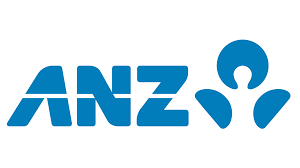

In [9]:
from IPython.display import Image
Image(filename = "download.png", width = 600, height = 300)

In [10]:
import warnings

warnings.filterwarnings('ignore')


In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
df = pd.read_excel('DECEMBER-COUNTER-2016.xlsx')

In [13]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [15]:
df.shape

(12043, 23)

In [16]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [17]:
df['month'] = df.date.dt.month

In [18]:
df.extraction = df.extraction.apply(lambda x: x.replace('.000+0000'," "))

In [19]:
df.extraction = pd.to_datetime(df['extraction'])

In [20]:
df['extraction_date'] = df.extraction.dt.date

In [21]:
df['extraction_date'] = pd.to_datetime(df.extraction_date)

In [22]:
df['extraction_time'] = df.extraction.dt.time

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [24]:
df = df.drop('extraction',axis=1)

In [25]:
df.shape

(12043, 25)

In [26]:
#finding the percentage of null values

100*df.isnull().sum()/12043

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
month                 0.000000
extraction_date       0.000000
extraction_time       0.000000
dtype: float64

In [27]:
#dropping bpay_biller_code and merchant_code
df.drop('bpay_biller_code',axis=1,inplace=True)


In [28]:
df.drop('merchant_code',axis=1,inplace=True)


In [29]:
df['age_groups'] = pd.cut(df.age,[17,20,30,40,50,60,70,80,90],labels=['18-20','20-30','30-40','40-50','50-60','60-70','70-80','>90'])

In [30]:
#dropping merchant_id and merchant_long_lat  

In [31]:
df.drop('merchant_id',axis=1,inplace=True)

In [32]:
df.drop('merchant_long_lat',axis=1,inplace=True)

In [33]:
#percentage of null values in each column
100*df.isnull().sum()/12043

status                0.000000
card_present_flag    35.921282
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
movement              0.000000
month                 0.000000
extraction_date       0.000000
extraction_time       0.000000
age_groups            0.000000
dtype: float64

In [34]:
df.drop('transaction_id',axis=1,inplace=True)

# Lets look into data and find some useful insights

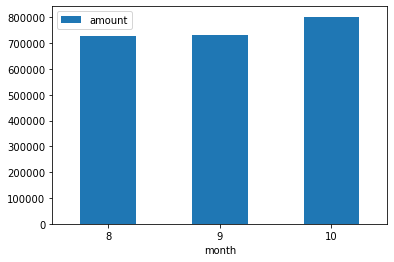

In [35]:
df.groupby(by=['month']).sum()[['amount']].plot.bar()
plt.xticks(rotation=0)
plt.show()

### Transaction amount is much more in the month of October

## Finding the customer having the highest aggregate transaction amount

In [36]:
# find the customer transacation the most
df.groupby(by=['first_name'])['amount'].sum().sort_values(ascending=False).head(5)

first_name
Michael    142329.98
Kenneth     82195.29
Jessica     63533.73
Richard     55578.70
Ryan        53408.03
Name: amount, dtype: float64

### Find the cash movemement with the time period

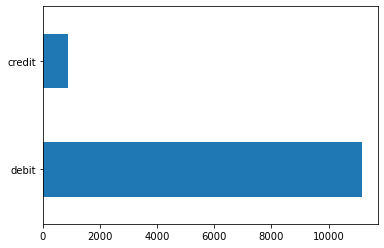

In [37]:
df.movement.value_counts().plot.barh()
plt.show()

### Finding the age group of the customers in the dataframe

<AxesSubplot:>

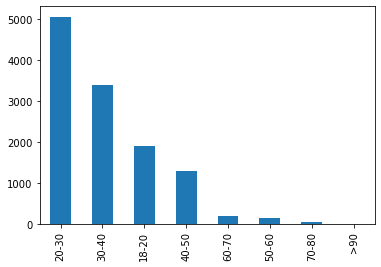

In [38]:
df['age_groups'].value_counts().plot.bar()

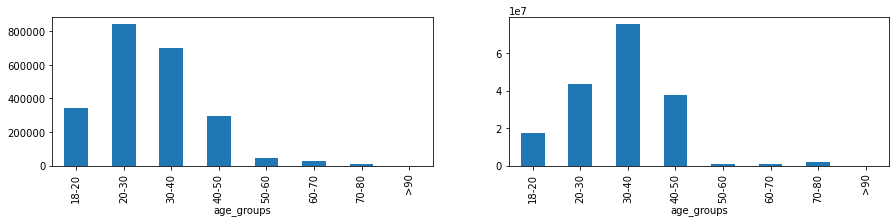

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
df.groupby(by=['age_groups'])['amount'].sum().plot.bar()
plt.subplot(2,2,2)
df.groupby(by=['age_groups'])['balance'].sum().plot.bar()
plt.show()

Infernece 1 : The aggregate transacation amount is much higher in the age group 20-30


Infernece 2 : The aggregate balance amount is the highest in the range 30-40

<AxesSubplot:xlabel='date'>

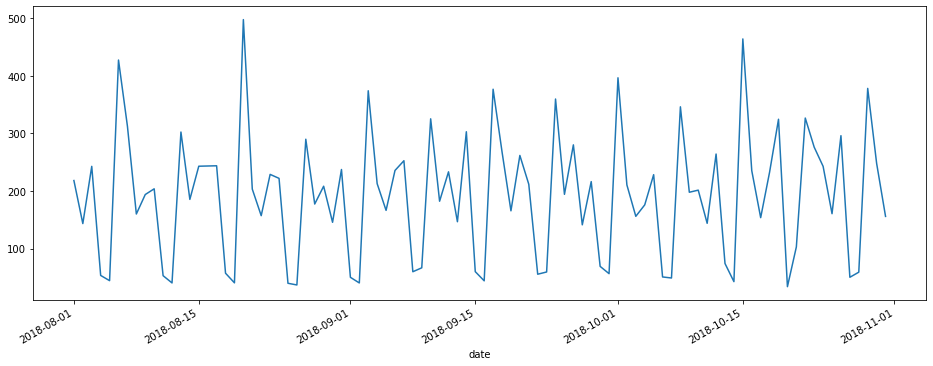

In [41]:
plt.figure(figsize=(16,6))

df.groupby(by=['date'])['amount'].mean().plot()

### The average transaction amount done by the bank over the given period.

### The number of male and females customers

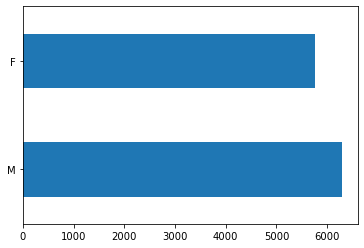

In [122]:
df.gender.value_counts().plot.barh()
plt.show()

In [99]:
vic_state = df.loc[df.merchant_state=='VIC']

In [102]:
vic_sub = vic_state.groupby(by=['merchant_suburb'])['amount'].sum().sort_values(ascending=False).head(5)

<AxesSubplot:xlabel='merchant_suburb'>

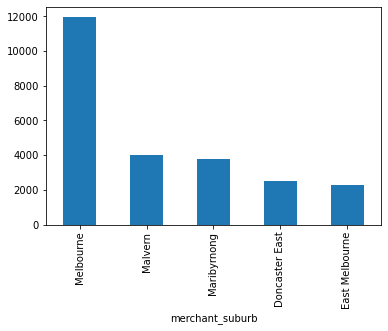

In [104]:
vic_sub.plot.bar()

In [ ]:
df.merchant_suburb

## Finding the state having the mot transaction in the given period

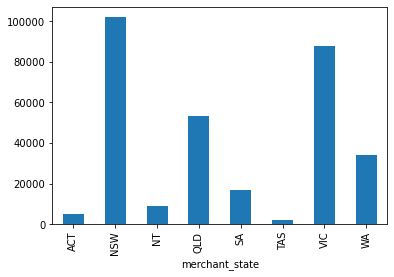

In [44]:
df.groupby(by=['merchant_state'])['amount'].sum().plot.bar()
plt.show()

In [109]:
nsw_state = df.loc[df.merchant_state=='NSW']


In [110]:
nsw_sub = nsw_state.groupby(by=['merchant_suburb'])['amount'].sum().sort_values(ascending=False).head(5)


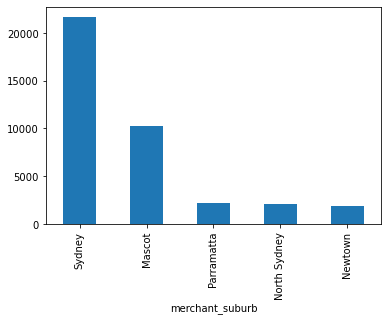

In [123]:
nsw_sub.plot.bar()
plt.show()

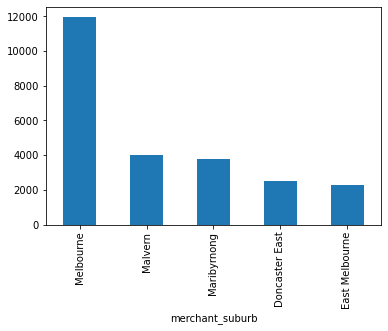

In [124]:
vic_state = df.loc[df.merchant_state=='VIC']

vic_sub = vic_state.groupby(by=['merchant_suburb'])['amount'].sum().sort_values(ascending=False).head(5)

vic_sub.plot.bar()
plt.show()